In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from kaleido.scopes.plotly import PlotlyScope
from bokeh.io import export_png

In [3]:
# Read in the data
csushpinsa_df = pd.read_csv('data/CSUSHPINSA.csv')
# Convert the date column to datetime
csushpinsa_df['DATE'] = pd.to_datetime(csushpinsa_df['DATE'])
csushpinsa_df.tail()

,DATE,CSUSHPINSA
430,2022-11-01,296.809
431,2022-12-01,294.266
432,2023-01-01,292.444
433,2023-02-01,293.390
434,2023-03-01,297.077


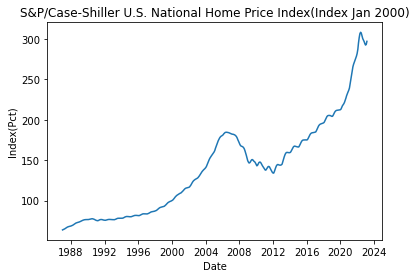

In [4]:
# Plot S&P/Case-Shiller U.S. National Home Price Index
plt.plot(csushpinsa_df['DATE'], csushpinsa_df['CSUSHPINSA'])
plt.title('S&P/Case-Shiller U.S. National Home Price Index(Index Jan 2000)')
plt.xlabel('Date')
plt.ylabel('Index(Pct)')
plt.show()

In [5]:
# read in the data
evacantusq176n_df = pd.read_csv('data/EVACANTUSQ176N.csv')
# add rows for missing months and fill with most recent value
evacantusq176n_df = evacantusq176n_df.set_index('DATE')
evacantusq176n_df.index = pd.to_datetime(evacantusq176n_df.index)
evacantusq176n_df = evacantusq176n_df.resample('MS').ffill()
evacantusq176n_df = evacantusq176n_df.reset_index()
evacantusq176n_df.shape

(274, 2)

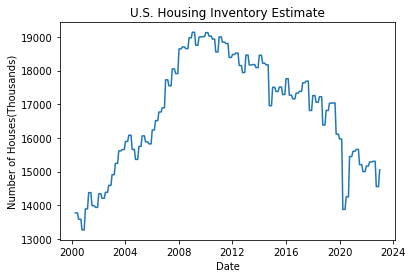

In [6]:
# Plot the U.S. Housing Inventory Estimate
plt.plot(evacantusq176n_df['DATE'], evacantusq176n_df['EVACANTUSQ176N'])
plt.title('U.S. Housing Inventory Estimate')
plt.xlabel('Date')
plt.ylabel('Number of Houses(Thousands)')
plt.show()

In [7]:
# read in the data
GDP_df = pd.read_csv('data/GDP.csv')
# add rows for missing months and fill with most recent value
GDP_df = GDP_df.set_index('DATE')
GDP_df.index = pd.to_datetime(GDP_df.index)
GDP_df = GDP_df.resample('MS').ffill()
GDP_df = GDP_df.reset_index()
GDP_df.tail()

,DATE,GDP
908,2022-09-01,25723.941
909,2022-10-01,26137.992
910,2022-11-01,26137.992
911,2022-12-01,26137.992
912,2023-01-01,26486.287


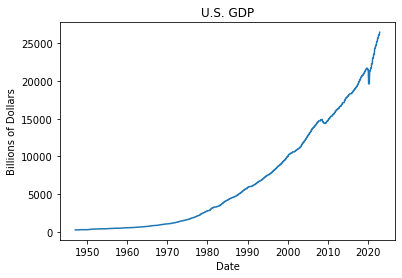

In [8]:
# Plot the U.S. GDP
plt.plot(GDP_df['DATE'], GDP_df['GDP'])
plt.title('U.S. GDP')
plt.xlabel('Date')
plt.ylabel('Billions of Dollars')
plt.show()

In [9]:
# read in the data
intdsrusm193n_df = pd.read_csv('data/INTDSRUSM193N.csv')
# convert the date column to datetime
intdsrusm193n_df['DATE'] = pd.to_datetime(intdsrusm193n_df['DATE'])
# add rows for months up to 2023-03-01 and fill with most recent value
for i in range(1, 2):
    intdsrusm193n_df = intdsrusm193n_df.append({'DATE': pd.to_datetime('2023-03-01') + pd.DateOffset(months=i)}, ignore_index=True)
intdsrusm193n_df = intdsrusm193n_df.set_index('DATE')
intdsrusm193n_df.index = pd.to_datetime(intdsrusm193n_df.index)
intdsrusm193n_df = intdsrusm193n_df.resample('MS').ffill()
intdsrusm193n_df = intdsrusm193n_df.reset_index()
# drop the last row
intdsrusm193n_df = intdsrusm193n_df.drop(intdsrusm193n_df.tail(1).index)
intdsrusm193n_df.tail()

,DATE,INTDSRUSM193N
874,2022-11-01,0.25
875,2022-12-01,0.25
876,2023-01-01,0.25
877,2023-02-01,0.25
878,2023-03-01,0.25


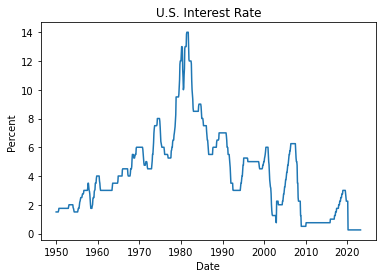

In [10]:
# Plot the U.S. Interest Rate
plt.plot(intdsrusm193n_df['DATE'], intdsrusm193n_df['INTDSRUSM193N'])
plt.title('U.S. Interest Rate')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.show()

In [11]:
# read in the data
mortgage30us_df = pd.read_csv('data/MORTGAGE30US.csv')
# convert the date column to datetime
mortgage30us_df['DATE'] = pd.to_datetime(mortgage30us_df['DATE'])
# drop the last row
mortgage30us_df = mortgage30us_df[:-1]
# set the 'MORTGAGE30US_NBD19710401' column to 'MORTGAGE30US'
mortgage30us_df = mortgage30us_df.rename(columns={'MORTGAGE30US_NBD19710401': 'MORTGAGE30US'})
# make sure the 'MORTGAGE30US' column is numeric
mortgage30us_df['MORTGAGE30US'] = pd.to_numeric(mortgage30us_df['MORTGAGE30US'])

mortgage30us_df.tail()

,DATE,MORTGAGE30US
621,2023-01-01,85.80711
622,2023-02-01,85.60192
623,2023-03-01,89.52120
624,2023-04-01,86.76471
625,2023-05-01,87.89330


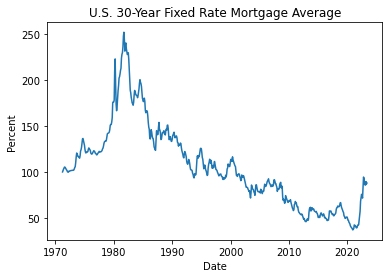

In [12]:
# Plot the U.S. 30-Year Fixed Rate Mortgage Average
plt.plot(mortgage30us_df['DATE'], mortgage30us_df['MORTGAGE30US'])
plt.title('U.S. 30-Year Fixed Rate Mortgage Average')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.show()

In [13]:
# read in the data
msacsr_df = pd.read_csv('data/MSACSR.csv')
# add rows for missing months and fill with most recent value
msacsr_df = msacsr_df.set_index('DATE')
msacsr_df.index = pd.to_datetime(msacsr_df.index)
msacsr_df = msacsr_df.resample('MS').ffill()
msacsr_df = msacsr_df.reset_index()
msacsr_df.tail()

,DATE,MSACSR
719,2022-12-01,8.5
720,2023-01-01,8.1
721,2023-02-01,8.3
722,2023-03-01,7.9
723,2023-04-01,7.6


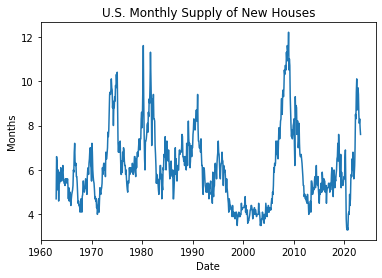

In [14]:
# Plot the U.S. Monthly Supply of New Houses
plt.plot(msacsr_df['DATE'], msacsr_df['MSACSR'])
plt.title('U.S. Monthly Supply of New Houses')
plt.xlabel('Date')
plt.ylabel('Months')
plt.show()

In [15]:
# read in the data
mspus_df = pd.read_csv('data/MSPUS.csv')
# add rows for missing months and fill with most recent value
mspus_df = mspus_df.set_index('DATE')
mspus_df.index = pd.to_datetime(mspus_df.index)
mspus_df = mspus_df.resample('MS').ffill()
mspus_df = mspus_df.reset_index()
mspus_df.tail()

,DATE,MSPUS
716,2022-09-01,468000.0
717,2022-10-01,479500.0
718,2022-11-01,479500.0
719,2022-12-01,479500.0
720,2023-01-01,436800.0


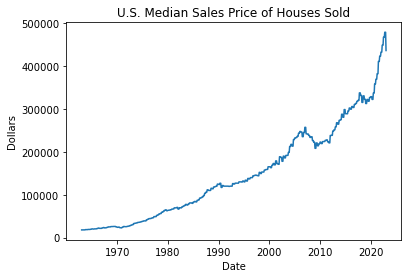

In [16]:
# Plot the U.S. Median Sales Price of Houses Sold
plt.plot(mspus_df['DATE'], mspus_df['MSPUS'])
plt.title('U.S. Median Sales Price of Houses Sold')
plt.xlabel('Date')
plt.ylabel('Dollars')
plt.show()

In [17]:
# read in the data
permit_df = pd.read_csv('data/PERMIT.csv')
# convert the date column to datetime
permit_df['DATE'] = pd.to_datetime(permit_df['DATE'])
permit_df.tail()

,DATE,PERMIT
755,2022-12-01,1409.0
756,2023-01-01,1354.0
757,2023-02-01,1482.0
758,2023-03-01,1437.0
759,2023-04-01,1417.0


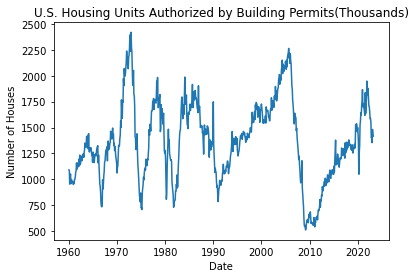

In [18]:
# Plot the U.S. Housing Units Authorized by Building Permits
plt.plot(permit_df['DATE'], permit_df['PERMIT'])
plt.title('U.S. Housing Units Authorized by Building Permits(Thousands)')
plt.xlabel('Date')
plt.ylabel('Number of Houses')
plt.show()

In [19]:
# read in the data
tlrescons_df = pd.read_csv('data/TLRESCONS.csv')
# convert the date column to datetime
tlrescons_df['DATE'] = pd.to_datetime(tlrescons_df['DATE'])
# add rows for each month dating back to 1987-01-01
for i in range(0, 180):
    tlrescons_df = tlrescons_df.append({'DATE': pd.to_datetime('1987-01-01')+ pd.DateOffset(months=i)}, ignore_index=True)
# sort the dataframe by date
tlrescons_df = tlrescons_df.sort_values(by='DATE')
# fill in the missing values with the median value
tlrescons_df['TLRESCONS'] = tlrescons_df['TLRESCONS'].fillna(tlrescons_df['TLRESCONS'].median())

tlrescons_df.head()

,DATE,TLRESCONS
256,1987-01-01,482232.0
257,1987-02-01,482232.0
258,1987-03-01,482232.0
259,1987-04-01,482232.0
260,1987-05-01,482232.0


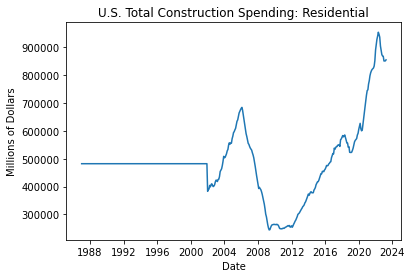

In [20]:
# Plot the U.S. Total Construction Spending: Residential
plt.plot(tlrescons_df['DATE'], tlrescons_df['TLRESCONS'])
plt.title('U.S. Total Construction Spending: Residential')
plt.xlabel('Date')
plt.ylabel('Millions of Dollars')
plt.show()

In [21]:
# read in the data
umcsent_df = pd.read_csv('data/UMCSENT.csv')
# convert the date column to datetime
umcsent_df['DATE'] = pd.to_datetime(umcsent_df['DATE'])
umcsent_df.head()

,DATE,UMCSENT
0,1987-01-01,90.4
1,1987-02-01,90.2
2,1987-03-01,90.8
3,1987-04-01,92.8
4,1987-05-01,91.1


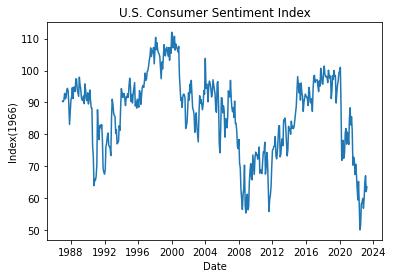

In [22]:
# Plot the U.S. Consumer Sentiment Index
plt.plot(umcsent_df['DATE'], umcsent_df['UMCSENT'])
plt.title('U.S. Consumer Sentiment Index')
plt.xlabel('Date')
plt.ylabel('Index(1966)')
plt.show()

In [23]:
import requests
import json

In [24]:
# use the alpha vantage api to get commodity prices
url = "https://www.alphavantage.co/query?function=CORN&interval=monthly&apikey=demo"
r = requests.get(url)
data = r.json()
# convert the json to a dataframe
corn_df = pd.DataFrame.from_dict(data['data'])
# convert the date column to datetime
corn_df['date'] = pd.to_datetime(corn_df['date'])
# remove the rows before 1990
corn_df = corn_df[corn_df['date'] > '1990-01-01']
# rename the 'date' column to 'DATE'
corn_df = corn_df.rename(columns={'date': 'DATE'})
# convert the price column to a float with 2 decimal places
corn_df['value'] = corn_df['value'].astype(float).round(2)
# rename the 'value' column to 'price'
corn_df = corn_df.rename(columns={'value': 'price'})

corn_df.tail()


,DATE,price
394,1990-06-01,120.07
395,1990-05-01,121.25
396,1990-04-01,118.50
397,1990-03-01,109.84
398,1990-02-01,106.29


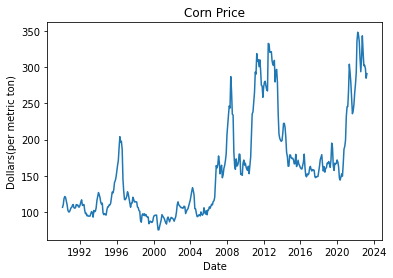

In [25]:
# Plot the Corn Price
plt.plot(corn_df['DATE'], corn_df['price'])
plt.title('Corn Price')
plt.xlabel('Date')
plt.ylabel('Dollars(per metric ton)')
plt.show()

In [26]:
# use the alpha vantage api to get coffee prices
url = "https://www.alphavantage.co/query?function=COFFEE&interval=monthly&apikey=demo"
r = requests.get(url)
data = r.json()
# convert the json to a dataframe
coffee_df = pd.DataFrame.from_dict(data['data'])
# convert the date column to datetime
coffee_df['date'] = pd.to_datetime(coffee_df['date'])
# remove the rows before 1990
coffee_df = coffee_df[coffee_df['date'] > '1990-01-01']
# rename the 'date' column to 'DATE'
coffee_df = coffee_df.rename(columns={'date': 'DATE'})
# convert the price column to a float with 2 decimal places
coffee_df['value'] = coffee_df['value'].astype(float).round(2)
# rename the 'value' column to 'price'
coffee_df = coffee_df.rename(columns={'value': 'price'})
coffee_df.tail()

,DATE,price
394,1990-06-01,88.26
395,1990-05-01,92.02
396,1990-04-01,93.73
397,1990-03-01,93.96
398,1990-02-01,84.01


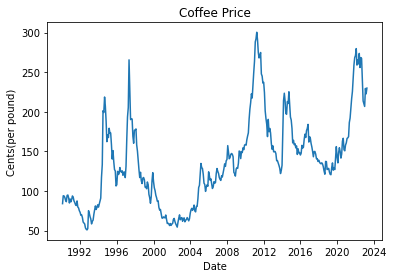

In [27]:
# Plot the Coffee Price
plt.plot(coffee_df['DATE'], coffee_df['price'])
plt.title('Coffee Price')
plt.xlabel('Date')
plt.ylabel('Cents(per pound)')
plt.show()

In [28]:
# use the alpha vantage api to get cotton prices
url = "https://www.alphavantage.co/query?function=COTTON&interval=monthly&apikey=demo"
r = requests.get(url)
data = r.json()
# convert the json to a dataframe
cotton_df = pd.DataFrame.from_dict(data['data'])
# convert the date column to datetime
cotton_df['date'] = pd.to_datetime(cotton_df['date'])
# remove the rows before 1990
cotton_df = cotton_df[cotton_df['date'] > '1990-01-01']
# rename the 'date' column to 'DATE'
cotton_df = cotton_df.rename(columns={'date': 'DATE'})
# convert the price column to a float with 2 decimal places
cotton_df['value'] = cotton_df['value'].astype(float).round(2)
# rename the 'value' column to 'price'
cotton_df = cotton_df.rename(columns={'value': 'price'})
cotton_df.tail()

,DATE,price
394,1990-06-01,90.18
395,1990-05-01,85.60
396,1990-04-01,82.87
397,1990-03-01,78.90
398,1990-02-01,75.96


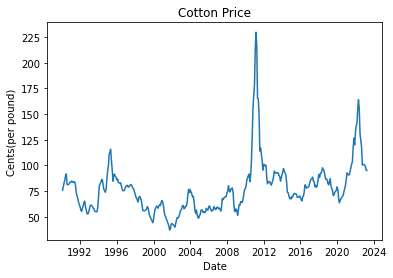

In [29]:
# Plot the Cotton Price
plt.plot(cotton_df['DATE'], cotton_df['price'])
plt.title('Cotton Price')
plt.xlabel('Date')
plt.ylabel('Cents(per pound)')
plt.show()

In [30]:
# use the alpha vantage api to get wheat prices
url = "https://www.alphavantage.co/query?function=WHEAT&interval=monthly&apikey=demo"
r = requests.get(url)
data = r.json()
# convert the json to a dataframe
wheat_df = pd.DataFrame.from_dict(data['data'])
# convert the date column to datetime
wheat_df['date'] = pd.to_datetime(wheat_df['date'])
# remove the rows before 1990
wheat_df = wheat_df[wheat_df['date'] > '1990-01-01']
# rename the 'date' column to 'DATE'
wheat_df = wheat_df.rename(columns={'date': 'DATE'})
# convert the price column to a float with 2 decimal places
wheat_df['value'] = wheat_df['value'].astype(float).round(2)
# rename the 'value' column to 'price'
wheat_df = wheat_df.rename(columns={'value': 'price'})
wheat_df.tail()

,DATE,price
394,1990-06-01,135.58
395,1990-05-01,149.18
396,1990-04-01,159.47
397,1990-03-01,156.53
398,1990-02-01,160.94


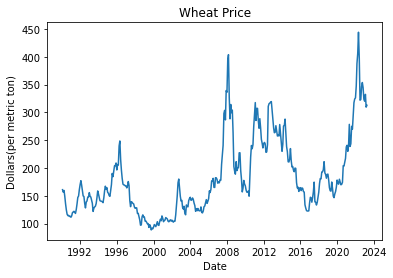

In [31]:
# Plot the Wheat Price
plt.plot(wheat_df['DATE'], wheat_df['price'])
plt.title('Wheat Price')
plt.xlabel('Date')
plt.ylabel('Dollars(per metric ton)')
plt.show()

In [32]:
# use the alpha vantage api to get unemployment data
url = "https://www.alphavantage.co/query?function=UNEMPLOYMENT&apikey=demo"
r = requests.get(url)
data = r.json()
# convert the json to a dataframe
unemployment_df = pd.DataFrame.from_dict(data['data'])
# convert the date column to datetime
unemployment_df['date'] = pd.to_datetime(unemployment_df['date'])
# rename the 'date' column to 'DATE'
unemployment_df = unemployment_df.rename(columns={'date': 'DATE'})
# make the 'value' column a percentage
unemployment_df['value'] = unemployment_df['value'].astype(float).round(2)
# rename the 'value' column to 'percent'
unemployment_df = unemployment_df.rename(columns={'value': 'percent'})
unemployment_df.tail()

,DATE,percent
900,1948-05-01,3.5
901,1948-04-01,3.9
902,1948-03-01,4.0
903,1948-02-01,3.8
904,1948-01-01,3.4


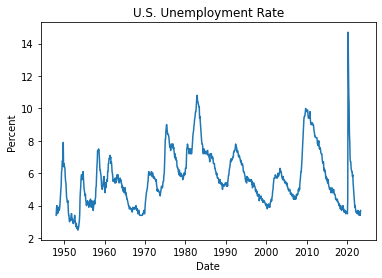

In [33]:
# Plot the U.S. Unemployment Rate
plt.plot(unemployment_df['DATE'], unemployment_df['percent'])
plt.title('U.S. Unemployment Rate')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.show()

In [34]:
# use the alpha vantage api to get crude oil prices
url = "https://www.alphavantage.co/query?function=WTI&interval=monthly&apikey=demo"
r = requests.get(url)
data = r.json()
# convert the json to a dataframe
oil_df = pd.DataFrame.from_dict(data['data'])
# convert the date column to datetime
oil_df['date'] = pd.to_datetime(oil_df['date'])
# rename the 'date' column to 'DATE'
oil_df = oil_df.rename(columns={'date': 'DATE'})
# convert the price column to a float with 2 decimal places
oil_df['value'] = oil_df['value'].astype(float).round(2)
# rename the 'value' column to 'price'
oil_df = oil_df.rename(columns={'value': 'price'})
oil_df.tail()

,DATE,price
444,1986-05-01,15.38
445,1986-04-01,12.84
446,1986-03-01,12.61
447,1986-02-01,15.46
448,1986-01-01,22.93


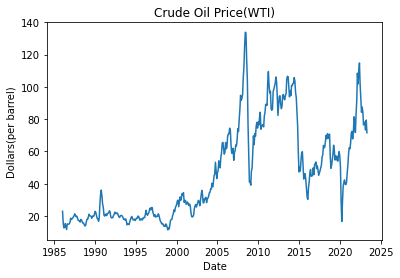

In [35]:
# Plot the Crude Oil Price
plt.plot(oil_df['DATE'], oil_df['price'])
plt.title('Crude Oil Price(WTI)')
plt.xlabel('Date')
plt.ylabel('Dollars(per barrel)')
plt.show()

In [36]:
# use the alpha vantage api to get the Consumer Price Index
url = "https://www.alphavantage.co/query?function=CPI&interval=monthly&apikey=demo"
r = requests.get(url)
data = r.json()
# convert the json to a dataframe
cpi_df = pd.DataFrame.from_dict(data['data'])
# convert the date column to datetime
cpi_df['date'] = pd.to_datetime(cpi_df['date'])
# rename the 'date' column to 'DATE'
cpi_df = cpi_df.rename(columns={'date': 'DATE'})
# convert the price column to a float with 2 decimal places
cpi_df['value'] = cpi_df['value'].astype(float).round(2)
# rename the 'value' column to 'price'
cpi_df = cpi_df.rename(columns={'value': 'price'})
cpi_df.head()

,DATE,price
0,2023-04-01,303.36
1,2023-03-01,301.84
2,2023-02-01,300.84
3,2023-01-01,299.17
4,2022-12-01,296.80


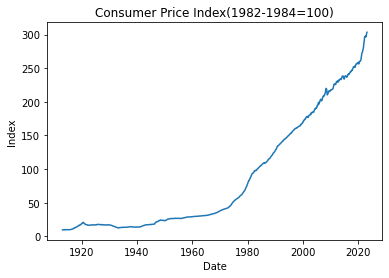

In [37]:
# Plot the Consumer Price Index
plt.plot(cpi_df['DATE'], cpi_df['price'])
plt.title('Consumer Price Index(1982-1984=100)')
plt.xlabel('Date')
plt.ylabel('Index')
plt.show()

In [38]:
# use the alpha vantage api to get the Effective Federal Funds Rate
url = "https://www.alphavantage.co/query?function=FEDERAL_FUNDS_RATE&interval=monthly&apikey=demo"
r = requests.get(url)
data = r.json()
# convert the json to a dataframe
fed_df = pd.DataFrame.from_dict(data['data'])
# convert the date column to datetime
fed_df['date'] = pd.to_datetime(fed_df['date'])
# rename the 'date' column to 'DATE'
fed_df = fed_df.rename(columns={'date': 'DATE'})
# convert the price column to a float with 2 decimal places
fed_df['value'] = fed_df['value'].astype(float).round(2)
# rename the 'value' column to 'rate'
fed_df = fed_df.rename(columns={'value': 'rate'})
fed_df.head()

,DATE,rate
0,2023-05-01,5.06
1,2023-04-01,4.83
2,2023-03-01,4.65
3,2023-02-01,4.57
4,2023-01-01,4.33


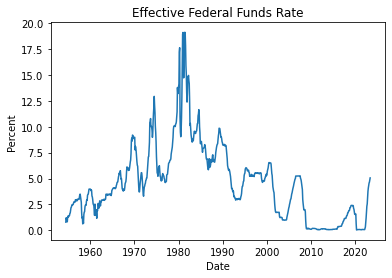

In [39]:
# Plot the Effective Federal Funds Rate
plt.plot(fed_df['DATE'], fed_df['rate'])
plt.title('Effective Federal Funds Rate')
plt.xlabel('Date')
plt.ylabel('Percent')
plt.show()

In [40]:
# load the csv file into a dataframe
nasdaq_df = pd.read_csv('data/NASDAQCOM.csv')
# convert the date column to datetime
nasdaq_df['DATE'] = pd.to_datetime(nasdaq_df['DATE'])
nasdaq_df.head()

,DATE,NASDAQCOM
0,1980-10-01,195.757826
1,1980-11-01,200.685556
2,1980-12-01,198.398636
3,1981-01-01,198.817619
4,1981-02-01,194.852105


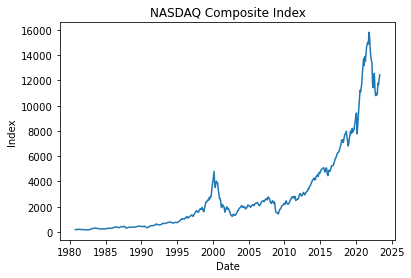

In [41]:
# Plot the NASDAQ Composite Index
plt.plot(nasdaq_df['DATE'], nasdaq_df['NASDAQCOM'])
plt.title('NASDAQ Composite Index')
plt.xlabel('Date')
plt.ylabel('Index')
plt.show()

In [42]:
# load the csv file into a dataframe
nfci_df = pd.read_csv('data/NFCI.csv')
# convert the date column to datetime
nfci_df['DATE'] = pd.to_datetime(nfci_df['DATE'])
nfci_df.head()

,DATE,NFCI
0,1971-01-01,0.7175
1,1971-02-01,0.8900
2,1971-03-01,1.0350
3,1971-04-01,1.2960
4,1971-05-01,1.4850


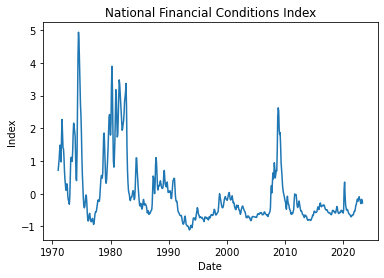

In [43]:
# Plot the National Financial Conditions Index
plt.plot(nfci_df['DATE'], nfci_df['NFCI'])
plt.title('National Financial Conditions Index')
plt.xlabel('Date')
plt.ylabel('Index')
plt.show()

In [44]:
# load the csv file into a dataframe
undcontsa_df = pd.read_csv('data/UNDCONTSA.csv')
# convert the date column to datetime
undcontsa_df['DATE'] = pd.to_datetime(undcontsa_df['DATE'])
undcontsa_df.head()

,DATE,UNDCONTSA
0,1970-01-01,889.0
1,1970-02-01,888.0
2,1970-03-01,890.0
3,1970-04-01,891.0
4,1970-05-01,883.0


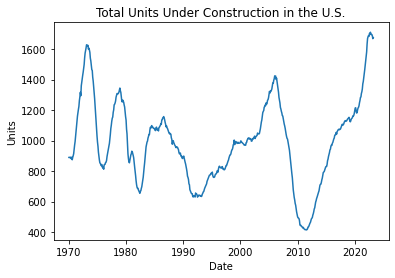

In [45]:
# Plot the total units under construction in the U.S.
plt.plot(undcontsa_df['DATE'], undcontsa_df['UNDCONTSA'])
plt.title('Total Units Under Construction in the U.S.')
plt.xlabel('Date')
plt.ylabel('Units')
plt.show()

In [46]:
# load the csv file into a dataframe
houst_df = pd.read_csv('data/HOUST.csv')
# convert the date column to datetime
houst_df['DATE'] = pd.to_datetime(houst_df['DATE'])
houst_df.head()

,DATE,HOUST
0,1959-01-01,1657.0
1,1959-02-01,1667.0
2,1959-03-01,1620.0
3,1959-04-01,1590.0
4,1959-05-01,1498.0


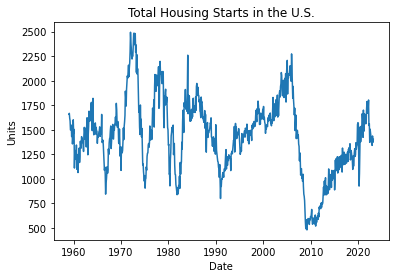

In [47]:
# Plot the total housing starts in the U.S.
plt.plot(houst_df['DATE'], houst_df['HOUST'])
plt.title('Total Housing Starts in the U.S.')
plt.xlabel('Date')
plt.ylabel('Units')
plt.show()

In [48]:
# load the csv file into a dataframe
wpu08_df = pd.read_csv('data/WPU08.csv')
# convert the date column to datetime
wpu08_df['DATE'] = pd.to_datetime(wpu08_df['DATE'])
wpu08_df.head()

,DATE,WPU08
0,1926-01-01,9.6
1,1926-02-01,9.5
2,1926-03-01,9.5
3,1926-04-01,9.4
4,1926-05-01,9.3


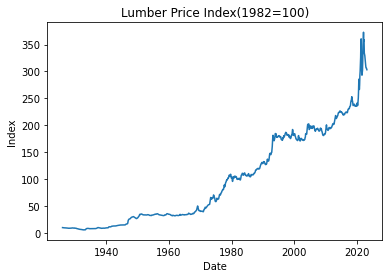

In [49]:
# Plot the lumber price index
plt.plot(wpu08_df['DATE'], wpu08_df['WPU08'])
plt.title('Lumber Price Index(1982=100)')
plt.xlabel('Date')
plt.ylabel('Index')
plt.show()

In [50]:
# load the csv file into a dataframe
price_pairs_df = pd.read_csv('data/SPCS10RPSNSA.csv')
# convert the date column to datetime
price_pairs_df['DATE'] = pd.to_datetime(price_pairs_df['DATE'])
price_pairs_df.head()

,DATE,SPCS10RPSNSA
0,1987-01-01,58585
1,1987-02-01,53102
2,1987-03-01,43500
3,1987-04-01,54405
4,1987-05-01,65151


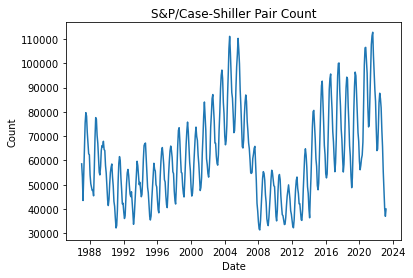

In [51]:
# Plot the S&P/Case-Shiller Pair Count
plt.plot(price_pairs_df['DATE'], price_pairs_df['SPCS10RPSNSA'])
plt.title('S&P/Case-Shiller Pair Count')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

In [52]:
# load the csv file into a dataframe
computsa_df = pd.read_csv('data/COMPUTSA.csv')
# convert the date column to datetime
computsa_df['DATE'] = pd.to_datetime(computsa_df['DATE'])
computsa_df.head()

,DATE,COMPUTSA
0,1968-01-01,1257.0
1,1968-02-01,1174.0
2,1968-03-01,1323.0
3,1968-04-01,1328.0
4,1968-05-01,1367.0


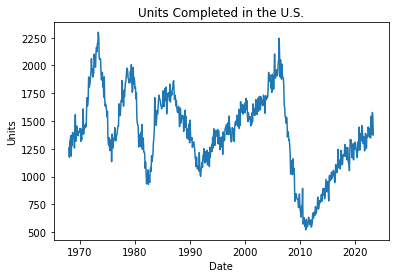

In [53]:
# Plot the units completed in the U.S.
plt.plot(computsa_df['DATE'], computsa_df['COMPUTSA'])
plt.title('Units Completed in the U.S.')
plt.xlabel('Date')
plt.ylabel('Units')
plt.show()

In [54]:
# merge all the dataframes on the date column
df = pd.merge(csushpinsa_df, msacsr_df, on='DATE')
df = pd.merge(df, permit_df, on='DATE')
df = pd.merge(df, umcsent_df, on='DATE')
df = pd.merge(df, undcontsa_df, on='DATE')
df = pd.merge(df, houst_df, on='DATE')
df = pd.merge(df, wpu08_df, on='DATE')
df = pd.merge(df, price_pairs_df, on='DATE')
df = pd.merge(df, mortgage30us_df, on='DATE')
df = pd.merge(df, computsa_df, on='DATE')
df = pd.merge(df, mspus_df, on='DATE')
df = pd.merge(df, oil_df, on='DATE')
df = pd.merge(df, cpi_df, on='DATE')
df = pd.merge(df, fed_df, on='DATE')
df = pd.merge(df, nasdaq_df, on='DATE')
df = pd.merge(df, nfci_df, on='DATE')
df

,DATE,CSUSHPINSA,MSACSR,PERMIT,UMCSENT,UNDCONTSA,HOUST,WPU08,SPCS10RPSNSA,MORTGAGE30US,COMPUTSA,MSPUS,price_x,price_y,rate,NASDAQCOM,NFCI
0,1987-01-01,63.734,6.0,1690.0,90.4,1090.0,1774.0,108.100,58585,125.90971,1862.0,97900.0,18.65,111.20,6.43,384.227143,-0.5060
1,1987-02-01,64.134,6.2,1689.0,90.2,1096.0,1784.0,109.400,53102,124.24761,1771.0,97900.0,17.75,111.60,6.10,411.712632,-0.4950
2,1987-03-01,64.469,6.0,1704.0,90.8,1084.0,1726.0,110.600,43500,123.59781,1694.0,97900.0,18.30,112.10,6.13,432.204545,-0.3350
3,1987-04-01,64.973,6.0,1601.0,92.8,1079.0,1614.0,110.700,54405,134.50752,1735.0,103400.0,18.68,112.70,6.37,422.771429,0.1050
4,1987-05-01,65.547,6.7,1500.0,91.1,1070.0,1628.0,110.700,65151,144.95212,1713.0,103400.0,19.44,113.10,6.85,416.634000,0.5400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
428,2022-09-01,300.451,9.7,1588.0,58.6,1698.0,1463.0,322.849,72386,83.61149,1438.0,468000.0,84.26,296.81,2.56,11402.850000,-0.1320
429,2022-10-01,298.672,9.7,1555.0,59.9,1710.0,1432.0,317.617,65599,94.39124,1348.0,479500.0,87.55,298.01,3.08,10801.494286,-0.0925
430,2022-11-01,296.809,9.4,1402.0,56.8,1695.0,1427.0,312.864,55272,93.09166,1543.0,479500.0,84.37,297.71,3.78,10973.638095,-0.1725
431,2022-12-01,294.266,8.5,1409.0,59.7,1696.0,1357.0,308.076,47749,87.05882,1390.0,479500.0,76.44,296.80,4.10,10838.995714,-0.1960


In [55]:
# rename the columns
df.columns = ['Date', 'Price Index', 'Monthly Supply', 'Permits', 'Sentiment Index', 'Construction', 'Housing Starts', 'Lumber Price Index', 'Pair Count', 'Mortgage Rate', 'Units Completed', 'Sales Price', 'Oil Price', 'CPI', 'Fed Funds Rate', 'NASDAQ', 'NFCI']
df.head()

,Date,Price Index,Monthly Supply,Permits,Sentiment Index,Construction,Housing Starts,Lumber Price Index,Pair Count,Mortgage Rate,Units Completed,Sales Price,Oil Price,CPI,Fed Funds Rate,NASDAQ,NFCI
0,1987-01-01,63.734,6.0,1690.0,90.4,1090.0,1774.0,108.1,58585,125.90971,1862.0,97900.0,18.65,111.2,6.43,384.227143,-0.506
1,1987-02-01,64.134,6.2,1689.0,90.2,1096.0,1784.0,109.4,53102,124.24761,1771.0,97900.0,17.75,111.6,6.10,411.712632,-0.495
2,1987-03-01,64.469,6.0,1704.0,90.8,1084.0,1726.0,110.6,43500,123.59781,1694.0,97900.0,18.30,112.1,6.13,432.204545,-0.335
3,1987-04-01,64.973,6.0,1601.0,92.8,1079.0,1614.0,110.7,54405,134.50752,1735.0,103400.0,18.68,112.7,6.37,422.771429,0.105
4,1987-05-01,65.547,6.7,1500.0,91.1,1070.0,1628.0,110.7,65151,144.95212,1713.0,103400.0,19.44,113.1,6.85,416.634000,0.540


In [56]:
df.shape

(433, 17)

In [57]:
# determine the number of missing values in each column
df.isnull().sum()

Date                  0
Price Index           0
Monthly Supply        0
Permits               0
Sentiment Index       0
Construction          0
Housing Starts        0
Lumber Price Index    0
Pair Count            0
Mortgage Rate         0
Units Completed       0
Sales Price           0
Oil Price             0
CPI                   0
Fed Funds Rate        0
NASDAQ                0
NFCI                  0
dtype: int64

In [58]:
# save the dataframe to a csv file
df.to_csv('data/housing_data3.csv', index=False)

In [84]:
# create a new dataframe that contains the top 6 features by importance
df2 = df[['Date', 'Price Index', 'Mortgage Rate', 'Oil Price', 'NASDAQ', 'Lumber Price Index', 'Construction', 'Fed Funds Rate']]
df2.head()

,Date,Price Index,Mortgage Rate,Oil Price,NASDAQ,Lumber Price Index,Construction,Fed Funds Rate
0,1987-01-01,63.734,125.90971,18.65,384.227143,108.1,1090.0,6.43
1,1987-02-01,64.134,124.24761,17.75,411.712632,109.4,1096.0,6.10
2,1987-03-01,64.469,123.59781,18.30,432.204545,110.6,1084.0,6.13
3,1987-04-01,64.973,134.50752,18.68,422.771429,110.7,1079.0,6.37
4,1987-05-01,65.547,144.95212,19.44,416.634000,110.7,1070.0,6.85


In [85]:
df2.corr()

,Price Index,Mortgage Rate,Oil Price,NASDAQ,Lumber Price Index,Construction,Fed Funds Rate
Price Index,1.000000,-0.774096,0.669161,0.873871,0.905812,0.600364,-0.631049
Mortgage Rate,-0.774096,1.000000,-0.652788,-0.666172,-0.775873,-0.120439,0.901905
Oil Price,0.669161,-0.652788,1.000000,0.439139,0.566647,0.021439,-0.616749
NASDAQ,0.873871,-0.666172,0.439139,1.000000,0.913555,0.557595,-0.503336
Lumber Price Index,0.905812,-0.775873,0.566647,0.913555,1.000000,0.490200,-0.645862
Construction,0.600364,-0.120439,0.021439,0.557595,0.490200,1.000000,0.049049
Fed Funds Rate,-0.631049,0.901905,-0.616749,-0.503336,-0.645862,0.049049,1.000000


In [86]:
# save the dataframe to a csv file
df2.to_csv('data/housing_data4.csv', index=False)

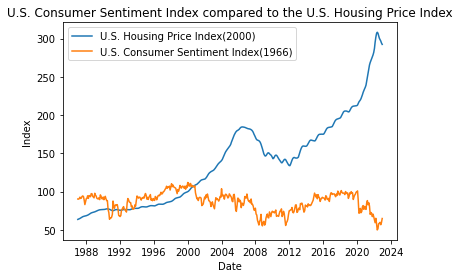

In [62]:
# Plot the U.S. Consumer Sentiment Index compared to the U.S. Housing Price Index
plt.plot(df['Date'], df['Price Index'], label='U.S. Housing Price Index(2000)')
plt.plot(df['Date'], df['Sentiment Index'], label='U.S. Consumer Sentiment Index(1966)')
plt.title('U.S. Consumer Sentiment Index compared to the U.S. Housing Price Index')
plt.xlabel('Date')
plt.ylabel('Index')
plt.legend()
plt.show()

In [81]:
# create an index of Fed Funds Rate based on the year 2000
ffr_index = df['Fed Funds Rate'] / df.loc[df['Date'] == '2000-01-01', 'Fed Funds Rate'].values[0] * 100
# use plotly to create a line graph of the U.S. Fed Funds Rate Index compared to the U.S. Housing Price Index
fig = px.line(df, x='Date', y=['Price Index', ffr_index], title='U.S. Fed Funds Rate Index compared to the U.S. Housing Price Index')
# name the wide_variable_1 variable with the name 'Fed Funds Rate Index'
fig.for_each_trace(lambda t: t.update(name=t.name.replace("wide_variable_1", "Fed Funds Rate Index")))
# save the graph
fig.write_image('images/ffr_vs_Price.png')
fig.show()

In [79]:
# use plotly to create a line graph of the U.S. Lumber Price Index compared to the U.S. Housing Price Index
fig = px.line(df, x='Date', y=['Price Index', 'Lumber Price Index'], title='U.S. Lumber Price Index compared to the U.S. Housing Price Index')
# save the graph
fig.write_image('images/Lumber_vs_Price.png')
fig.show()

In [65]:
# create an index of construction spending based on the year 2000
construction_index = df['Construction'] / df.loc[df['Date'] == '2000-01-01', 'Construction'].values[0] * 100
# use plotly to create a line graph of the U.S. Construction Spending Index compared to the U.S. Housing Price Index
fig = px.line(df, x='Date', y=['Price Index', construction_index], title='U.S. Construction Spending Index compared to the U.S. Housing Price Index')
# name the wide_variable_1 variable with the name 'Construction Spending Index'
fig.for_each_trace(lambda t: t.update(name=t.name.replace("wide_variable_1", "Construction Spending Index")))
# save the graph
fig.write_image('images/Construction_vs_Price.png')
fig.show()

In [66]:
# create an index of mortgage rate based on the year 2000
mortgage_rate_index = df['Mortgage Rate'] / df.loc[df['Date'] == '2000-01-01', 'Mortgage Rate'].values[0] * 100
# use plotly to create a line graph of the U.S. Mortgage Rate Index compared to the U.S. Housing Price Index
fig = px.line(df, x='Date', y=['Price Index', mortgage_rate_index], title='U.S. Mortgage Rate Index compared to the U.S. Housing Price Index')
# name the wide_variable_1 variable with the name 'Mortgage Rate Index'
fig.for_each_trace(lambda t: t.update(name=t.name.replace("wide_variable_1", "Mortgage Rate Index")))
# save the graph
fig.write_image('images/Mortgage_vs_Price.png')
fig.show()

In [67]:
# create an index of NASDAQ based on the year 2000
nasdaq_index = df['NASDAQ'] / df.loc[df['Date'] == '2000-01-01', 'NASDAQ'].values[0] * 100
# use plotly to create a line graph of the NASDAQ Index compared to the U.S. Housing Price Index
fig = px.line(df, x='Date', y=['Price Index', nasdaq_index], title='NASDAQ Index compared to the U.S. Housing Price Index')
# name the wide_variable_1 variable with the name 'NASDAQ Index'
fig.for_each_trace(lambda t: t.update(name=t.name.replace("wide_variable_1", "NASDAQ Index")))
# save the graph
fig.write_image('images/NASDAQ_vs_Price.png')
fig.show()

In [80]:
# create an index of NFCI based on the year 2000
oil_price_index = df['Oil Price'] / df.loc[df['Date'] == '2000-01-01', 'Oil Price'].values[0] * 100
# use plotly to create a line graph of the NFCI Index compared to the U.S. Housing Price Index
fig = px.line(df, x='Date', y=['Price Index', oil_price_index], title='Oil Price Index compared to the U.S. Housing Price Index')
# name the wide_variable_1 variable with the name 'NFCI Index'
fig.for_each_trace(lambda t: t.update(name=t.name.replace("wide_variable_1", "Oil Price Index")))
# save the graph
fig.write_image('images/Oil_vs_Price.png')
fig.show()